# Finding Pulsar signals

Before we search for pulsars, there is one very important concept we need to understand:
**how signals behave when we add noisy data together**.

Imagine we have **two different channels**:
- Each channel contains **different noise**
- But both channels contain the **same signal**

This is exactly what happens in real radio observations.

---

### What happens when we add them together?

When we add the two channels:
- The **signal** adds together perfectly, because it is the same in both channels
- The **noise** does *not* add in the same way, because it is random and different in each channel

So what does this mean?

- The signal becomes **twice as strong**
- The noise only increases by a factor of **$\sqrt{2}$**

This gives us an improvement in how easy the signal is to see.

---

### Signal-to-noise ratio (SNR)

We describe this improvement using the **signal-to-noise ratio**, or **SNR**.

If we add two channels:
- Signal increases by a factor of **2**
- Noise increases by a factor of **$\sqrt{2}$**

So the SNR improves by:

### $\frac{2}{\sqrt{2}} = \sqrt{2}$

This means the signal becomes **more visible compared to the noise**.

---
### Why this matters for pulsars

Pulsars are especially well suited to this technique because they are **broadband sources**.


This means a pulsar emits radio waves over a **wide range of frequencies**, not just at one single frequency.

Because of this, the **same pulsar signal appears in many frequency channels at the same time**, while the noise in each channel is different.

This is why astronomers:
- add many frequency channels together
- stack many pulses together

By combining the data in this way, we can make **very faint pulsars stand out from the noise**.


In [55]:
# import external packages
import numpy as np
import matplotlib.pyplot as plt

In [57]:
time, noise1 = np.load("data/channel_01_telescope_timeseries.npy")
time, noise2 = np.load("data/channel_02_telescope_timeseries.npy")
time, psr_slow = np.load("data/pulsar_signal_slow.npy")

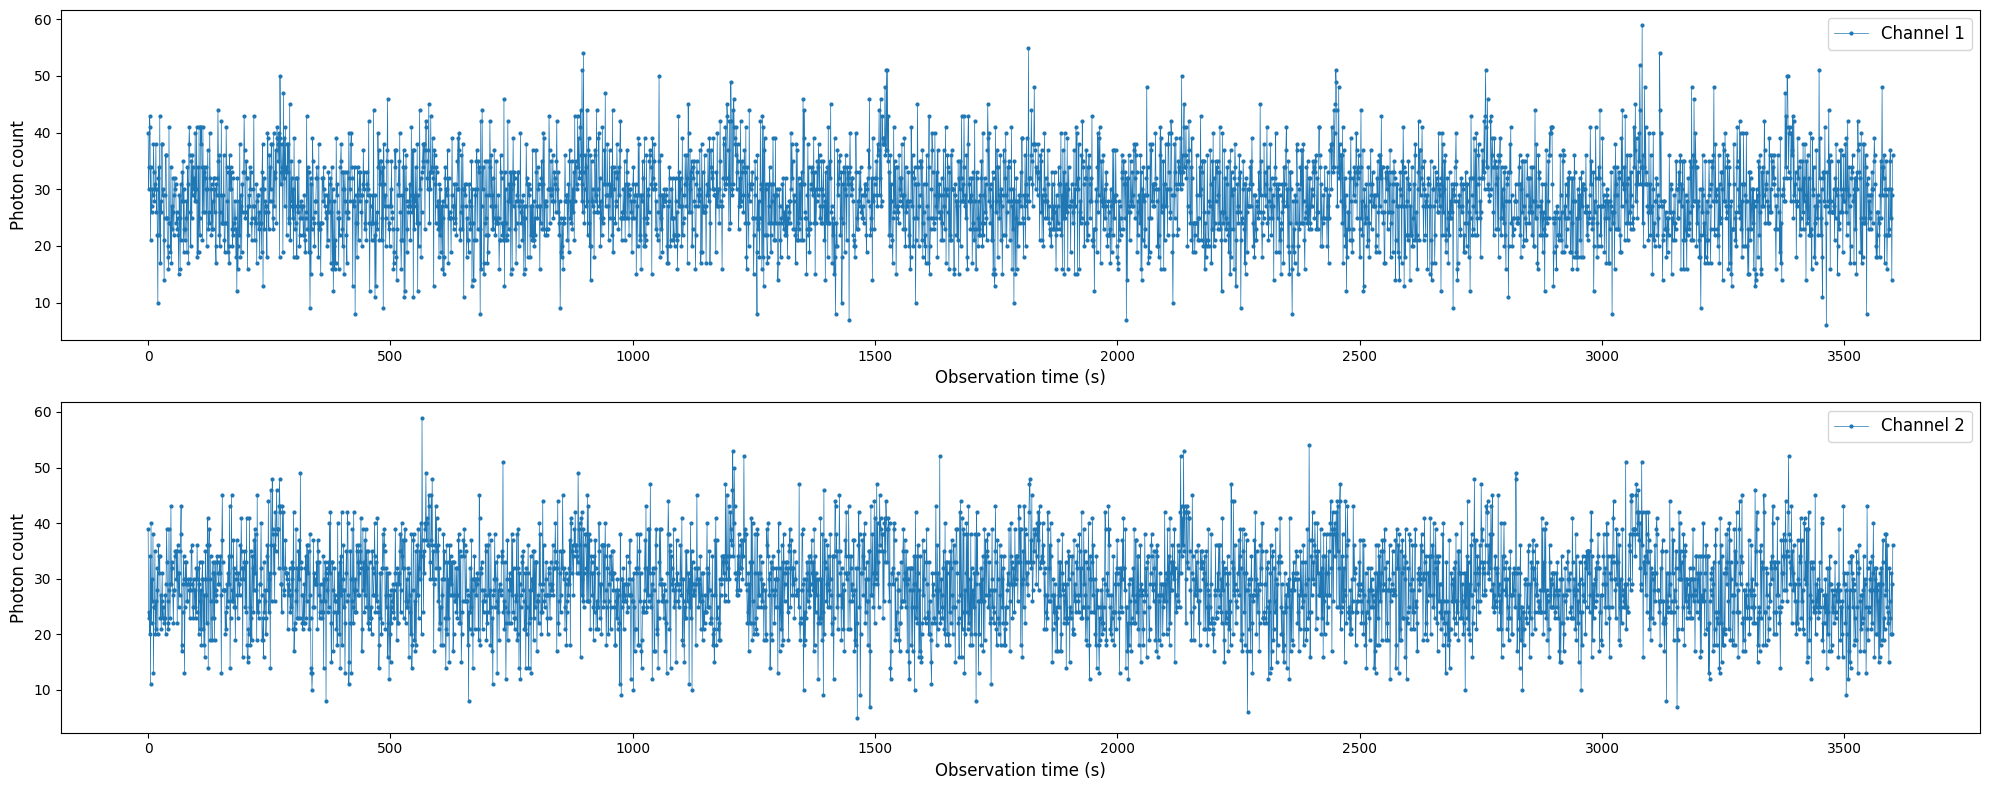

In [73]:
fig, (ax1, ax2) = plt.subplots(figsize=(20, 8), nrows=2)

faint_pulsar = psr_slow*3.5
channel1 = noise1 + np.round(faint_pulsar)
channel2 = noise2 + np.round(faint_pulsar)

ax1.plot(time, channel1, label='Channel 1', c='C0', ls='-', lw=0.5, marker='o', markersize=2)
ax1.legend(fontsize=12, loc=1)
ax1.set_xlabel('Observation time (s)', fontsize=12)
ax1.set_ylabel('Photon count', fontsize=12)

ax2.plot(time, channel2, label='Channel 2', c='C0', ls='-', lw=0.5, marker='o', markersize=2)
ax2.legend(fontsize=12, loc=1)
ax2.set_xlabel('Observation time (s)', fontsize=12)
ax2.set_ylabel('Photon count', fontsize=12)

plt.tight_layout()

You can see that in each channel, the pulsar is barely visable. Now what happens if we add them together?

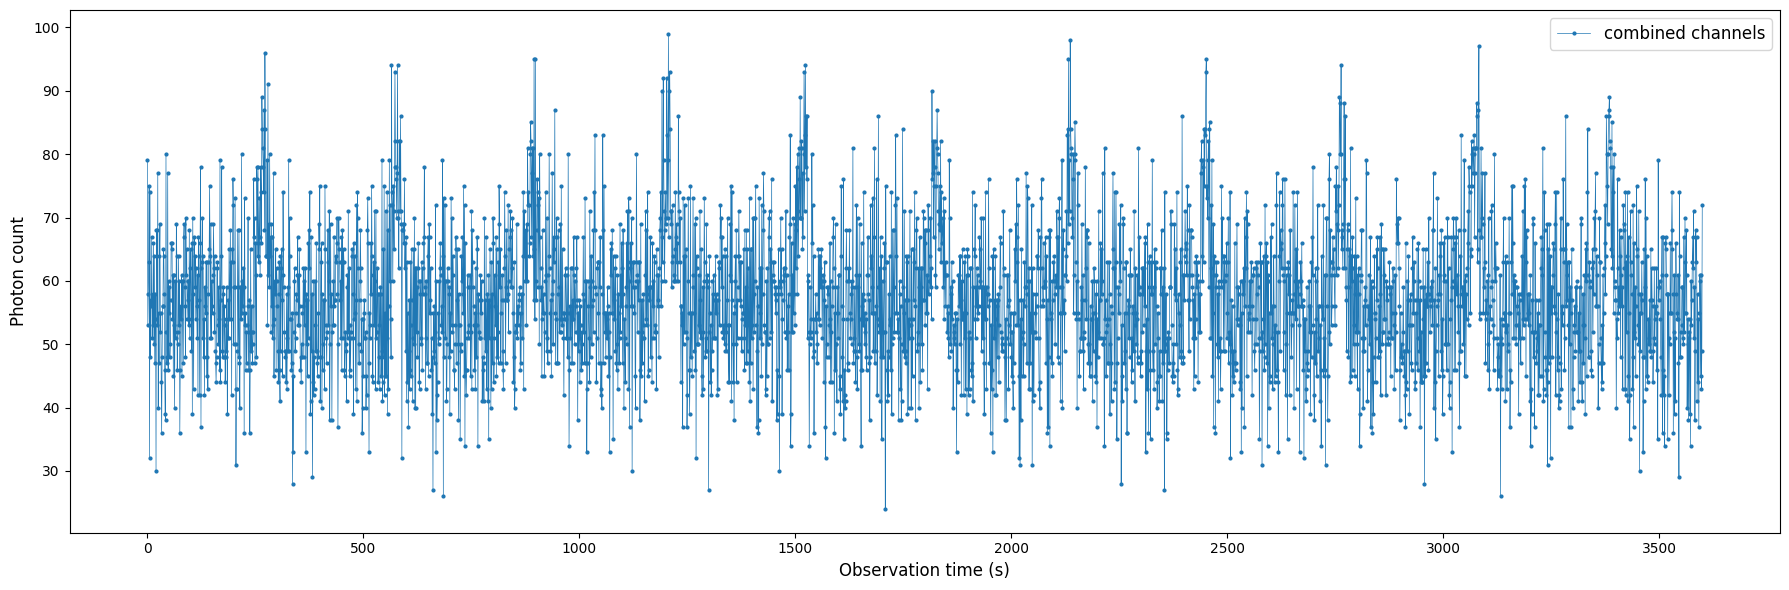

In [ ]:
fig,ax = plt.subplots(figsize=(18, 6))

faint_pulsar = psr_slow*4
channel1 = noise1 + np.round(faint_pulsar)
channel2 = noise2 + np.round(faint_pulsar)

ax.plot(time, channel1 + channel2, label='combined channels', c='C0', ls='-', lw=0.5, marker='o', markersize=2)
ax.legend(fontsize=12, loc=1)
ax.set_xlabel('Observation time (s)', fontsize=12)
ax.set_ylabel('Photon count', fontsize=12)

plt.tight_layout()

Amazing! you can see how the puslar signal is now stronger.

## How to find fainter pulsars

The key technique for finding very faint pulsars is called **folding**.

We just learned an important idea:
- when we **add the same signal together**, it becomes stronger
- when we **add noise together**, it only grows slowly

This means the **signal-to-noise ratio (SNR)** improves when we add repeated signals.

Pulsars are perfect for this, because their signals **repeat very regularly**.

---

### How folding works

Each pulsar emits a pulse every fixed amount of time, called the **period**.

Imagine that we already knew the pulsar period.

We could then:
1. Cut the time series into many short pieces, each with a length equal to one pulsar period
2. Stack all of these pieces on top of each other
3. Add them together

Because the pulsar pulse always occurs at the **same place in each period**, the pulses line up and **add together**.

The noise behaves differently:
- it is random in each period
- sometimes it adds, sometimes it cancels out

When we add many periods together:
- the **signal grows linearly**
- the **noise only grows slowly**

This means the **SNR increases**, and a faint pulsar can become visible again.

---

### But there is a problem…

To fold the data, we need to know the pulsar **period**.

For pulsars that have already been discovered, this is easy.  
But when searching for **new pulsars**, we do *not* know the period beforehand.

---

### Searching for the period

The solution is simple, but powerful.

We try **many different trial periods**:
- fold the data using one trial period
- look at the folded profile
- check whether a pulse appears

Then we try the next period, and the next, and the next…

This approach is called a **brute-force search**.

Most trial periods produce only noise.  
But when we try the **correct period**, all the pulses line up, the SNR increases, and a clear signal appears.

---

### This is how pulsars are found

Modern computers can try **millions of trial periods** very quickly.

This is why pulsar searching:
- requires a lot of computing power
- but allows us to detect extremely faint pulsars hidden deep in noise

Okay that was a lot of words. Let's see this in practice.

I have actually hidden a pulsar in the noisy channel data that we have been using so far.

We will now try folding the data ourselves and see how a hidden pulsar suddenly appears.

